# Лабораторная работа №1
## Тема: Построение и обучение простейшей нейронной сети

 ========================================
### Цель работы:
освоить базовые этапы построения и обучения многослойного персептрона (MLP): от подготовки данных и их визуализации до настройки параметров нейросети и анализа качества её работы

========================================


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
import seaborn as sns
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# загрузка и объединение данных из файлов в один датафрейм
files = glob("/content/drive/MyDrive/NN_labs/lab_1/*.csv")
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df.head()

,touches_size_exists,touches_size_min,touches_size_mean,touches_size_max,touches_size_std,gyroscope_exists,gyroscope_x_min,gyroscope_x_mean,gyroscope_x_max,gyroscope_x_std,...,accelerometer_z_min,accelerometer_z_mean,accelerometer_z_max,accelerometer_z_std,light_exists,light_min,light_mean,light_max,light_std,label
0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1
1,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1
2,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1
3,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1
4,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1


In [ ]:
# вывод информации о столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11613 entries, 0 to 11612
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   touches_size_exists   11613 non-null  int64  
 1   touches_size_min      11613 non-null  float64
 2   touches_size_mean     11613 non-null  float64
 3   touches_size_max      11613 non-null  float64
 4   touches_size_std      11613 non-null  float64
 5   gyroscope_exists      11613 non-null  int64  
 6   gyroscope_x_min       11613 non-null  float64
 7   gyroscope_x_mean      11613 non-null  float64
 8   gyroscope_x_max       11613 non-null  float64
 9   gyroscope_x_std       11613 non-null  float64
 10  gyroscope_y_min       11613 non-null  float64
 11  gyroscope_y_mean      11613 non-null  float64
 12  gyroscope_y_max       11613 non-null  float64
 13  gyroscope_y_std       11613 non-null  float64
 14  gyroscope_z_min       11613 non-null  float64
 15  gyroscope_z_mean   

In [ ]:
# на всякий еще раз проверяем, есть ли пропуски
df.isna().sum()

,0
touches_size_exists,0
touches_size_min,0
touches_size_mean,0
touches_size_max,0
touches_size_std,0
gyroscope_exists,0
gyroscope_x_min,0
gyroscope_x_mean,0
gyroscope_x_max,0
gyroscope_x_std,0


In [ ]:
# вывод различных статистик по столбцам
df.describe().T[['count', 'min', 'max', 'mean']].assign(n_unique_values = df.nunique())

,count,min,max,mean,n_unique_values
touches_size_exists,11613.0,0.000000,1.000000,0.973047,2
touches_size_min,11613.0,0.000000,240.000000,4.675431,235
touches_size_mean,11613.0,0.000000,249.000000,5.162074,1179
touches_size_max,11613.0,0.000000,274.500000,5.589083,262
touches_size_std,11613.0,0.000000,100.579521,0.351475,1035
gyroscope_exists,11613.0,0.000000,1.000000,0.932662,2
gyroscope_x_min,11613.0,-21.004671,2.007538,-0.270472,6075
gyroscope_x_mean,11613.0,-1.954713,4.434396,0.063362,6899
gyroscope_x_max,11613.0,-0.994489,23.129410,0.353728,6036
gyroscope_x_std,11613.0,0.000000,8.862875,0.174741,6913


Наибольшой интерес представляют бинарные столбцы: `touches_size_exists` (mean **0.973047**), `gyroscope_exists` (mean **0.932662**), `accelerometer_exists` (mean **0.993369**), `light_exists` (mean **0.400930**),

array([[<Axes: title={'center': 'touches_size_exists'}>,
        <Axes: title={'center': 'touches_size_min'}>,
        <Axes: title={'center': 'touches_size_mean'}>,
        <Axes: title={'center': 'touches_size_max'}>,
        <Axes: title={'center': 'touches_size_std'}>,
        <Axes: title={'center': 'gyroscope_exists'}>],
       [<Axes: title={'center': 'gyroscope_x_min'}>,
        <Axes: title={'center': 'gyroscope_x_mean'}>,
        <Axes: title={'center': 'gyroscope_x_max'}>,
        <Axes: title={'center': 'gyroscope_x_std'}>,
        <Axes: title={'center': 'gyroscope_y_min'}>,
        <Axes: title={'center': 'gyroscope_y_mean'}>],
       [<Axes: title={'center': 'gyroscope_y_max'}>,
        <Axes: title={'center': 'gyroscope_y_std'}>,
        <Axes: title={'center': 'gyroscope_z_min'}>,
        <Axes: title={'center': 'gyroscope_z_mean'}>,
        <Axes: title={'center': 'gyroscope_z_max'}>,
        <Axes: title={'center': 'gyroscope_z_std'}>],
       [<Axes: title={'center'

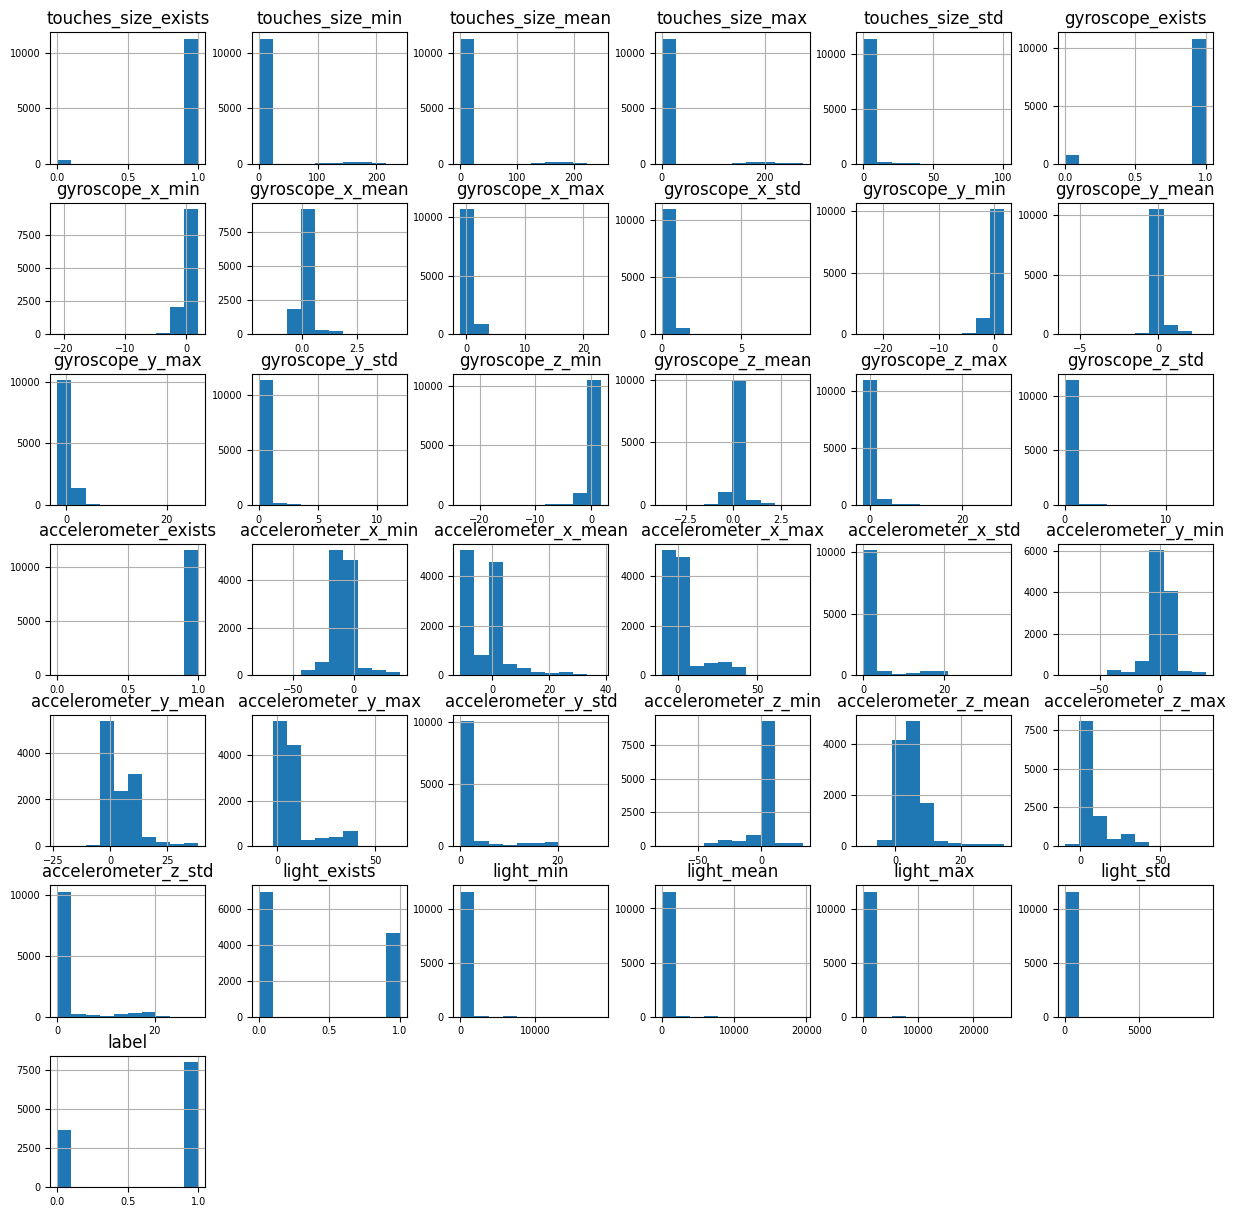

In [ ]:
# построение графиков распределения признаков
df.hist(figsize=(15, 15), xlabelsize=7, ylabelsize=7)

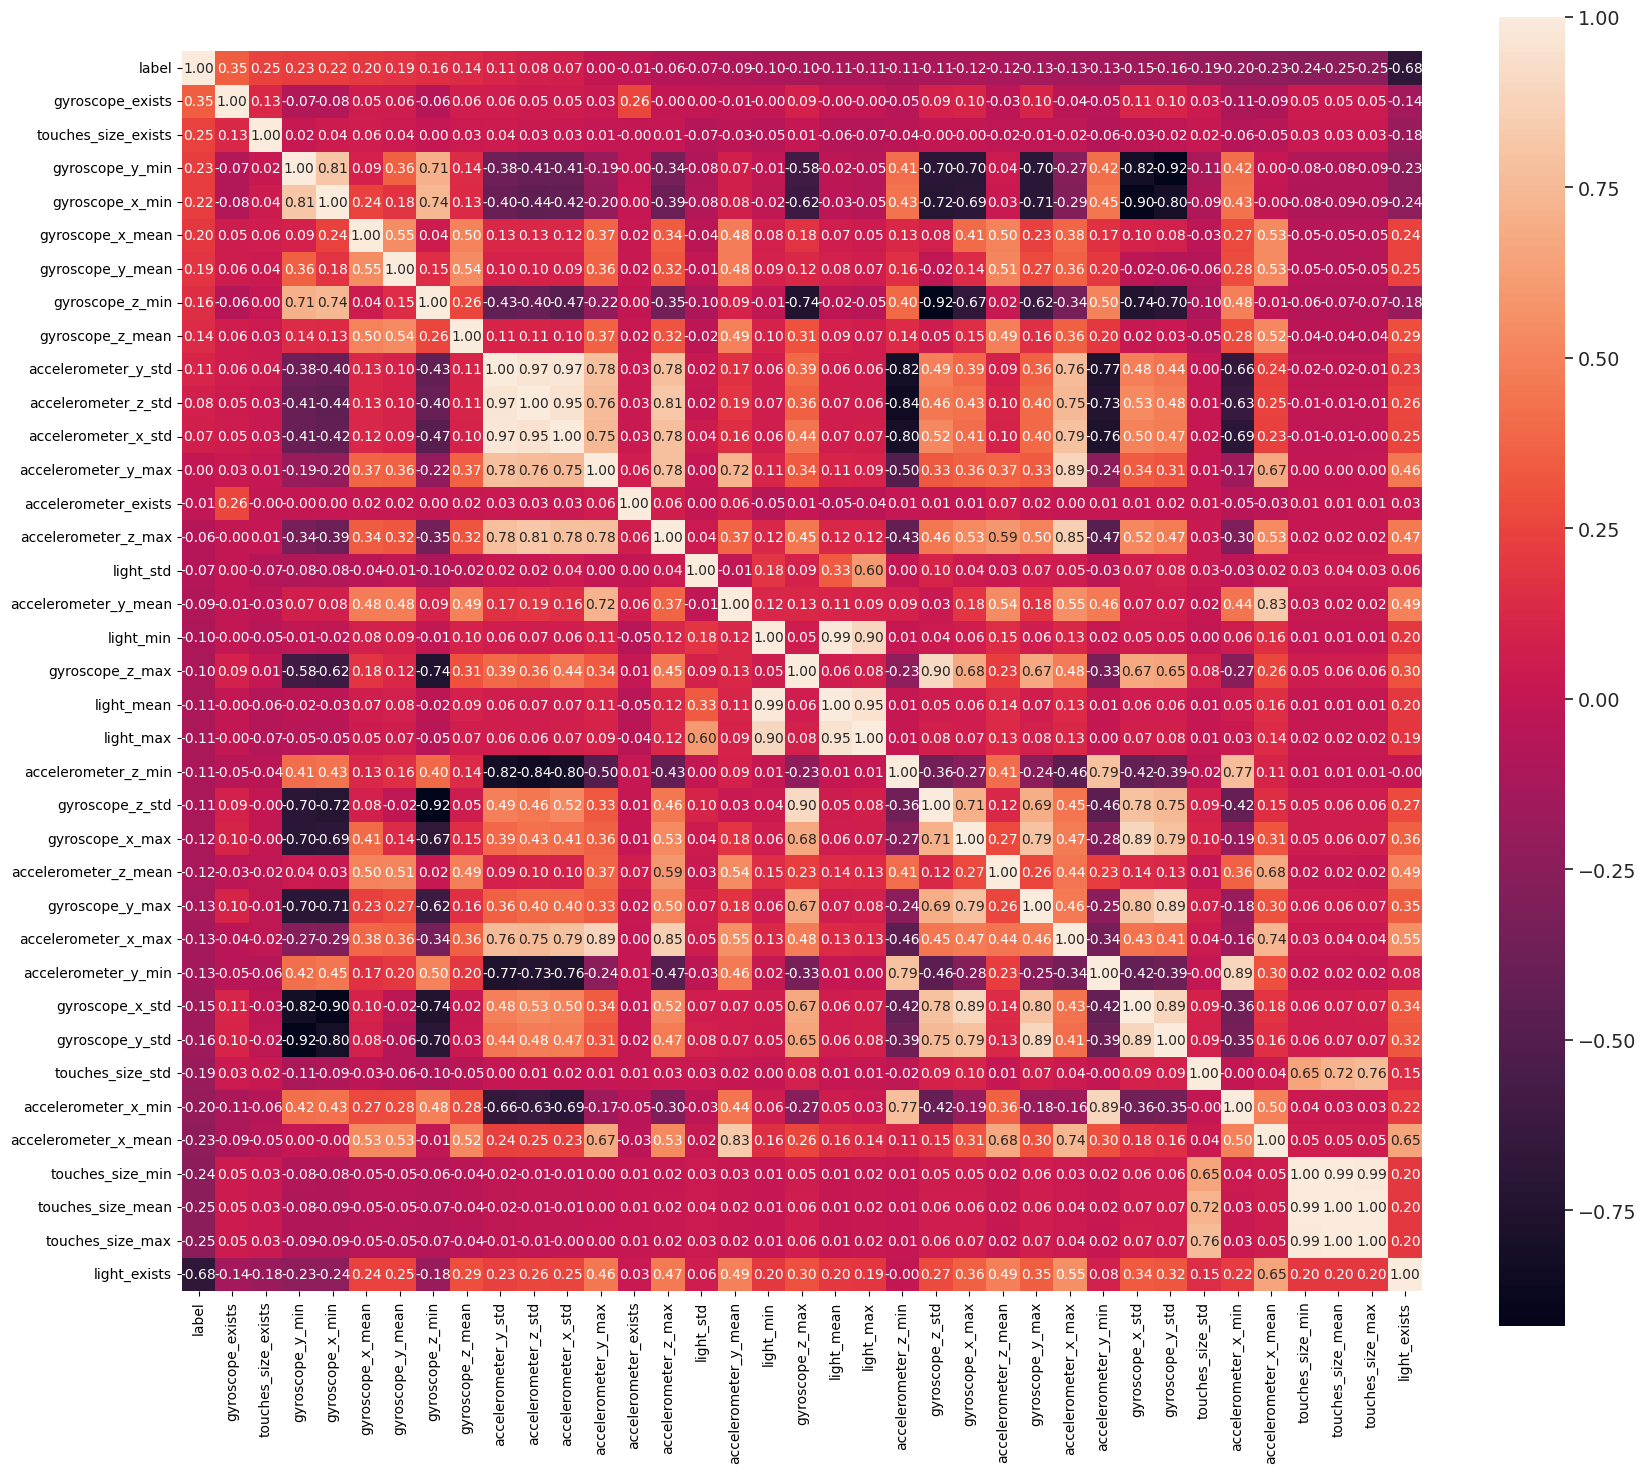

In [ ]:
# построение матрицы корреляций
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 17))
k = len(df.columns)
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
# вывод количества дубликатов
dup_count = df[df.duplicated()].shape[0]
all_count = df.shape[0]
print(f'Дубликатов: {dup_count} из {all_count} записей ({(dup_count / all_count * 100):.4f} %)')

Дубликатов: 3168 из 11613 записей (27.28 %)


In [ ]:
# вывод распределения целевой переменной
df['label'].value_counts()

,count
label,
1,7982
0,3631


In [ ]:
# дроп дубликатов и повторный вывод распределения целевой переменной
df_unique = df.drop_duplicates()
df_unique['label'].value_counts()

,count
label,
1,4815
0,3630


Теперь целевая переменная более сбалансированная

In [ ]:
# разносим целевую фичу и остальные в разные переменные
y = df_unique['label']
X = df_unique.drop('label', axis=1)

In [ ]:
# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (6756, 36)
Размер тестовой выборки: (1689, 36)


In [ ]:
# масштабирование признаков
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
pipeline = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
parameters = {
              'mlpclassifier__hidden_layer_sizes': [(5), (10), (50), (100), (5, 5), (10, 10), (50, 50), (100, 100), (5, 5, 5), (10, 10, 10), (50, 50, 50), (100, 100, 100)],
              'mlpclassifier__max_iter': [5, 10, 50, 100, 200, 500],
              'mlpclassifier__learning_rate_init': [1, 0.1, 0.001, 0.0001, 0.00001],
              }
CV_model = GridSearchCV(estimator=pipeline,
                        param_grid=parameters,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=4)
CV_model.fit(X, y)
print("Лучшие параметры", CV_model.best_params_)
print("ROC-AUC на кроссвалидации:", CV_model.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Лучшие параметры {'mlpclassifier__hidden_layer_sizes': 10, 'mlpclassifier__learning_rate_init': 0.1, 'mlpclassifier__max_iter': 10}
ROC-AUC на кроссвалидации: 0.9977618152639394


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_model = CV_model.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
y_pred = best_model.predict(X_test)

print(f"Тестовая ROC-AUC: {test_roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Тестовая ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       736
           1       1.00      0.99      1.00       953

    accuracy                           1.00      1689
   macro avg       1.00      1.00      1.00      1689
weighted avg       1.00      1.00      1.00      1689



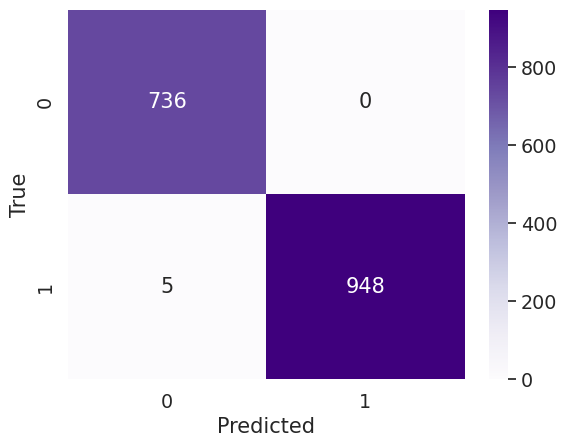

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
pipeline = make_pipeline(StandardScaler(), MLPClassifier(random_state=42, early_stopping=True, n_iter_no_change=5))
parameters = {
              'mlpclassifier__hidden_layer_sizes': [(5), (10), (50), (100), (5, 5), (10, 10), (50, 50), (100, 100), (5, 5, 5), (10, 10, 10), (50, 50, 50), (100, 100, 100)],
              'mlpclassifier__max_iter': [100, 200, 500, 1000],
              'mlpclassifier__learning_rate_init': [0.1, 0.01, 0.001, 0.0001],
              }
CV_model = GridSearchCV(estimator=pipeline,
                        param_grid=parameters,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1,
                        verbose=5)
CV_model.fit(X, y)
print("Лучшие параметры", CV_model.best_params_)
print("ROC-AUC на кроссвалидации:", CV_model.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Лучшие параметры {'mlpclassifier__hidden_layer_sizes': (5, 5, 5), 'mlpclassifier__learning_rate_init': 0.1, 'mlpclassifier__max_iter': 100}
ROC-AUC на кроссвалидации: 0.9966175490389594


In [ ]:
best_model = CV_model.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
y_pred = best_model.predict(X_test)

print(f"Тестовая ROC-AUC: {test_roc_auc:.4f}")
print(classification_report(y_test, y_pred))

Тестовая ROC-AUC: 0.9999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       736
           1       1.00      1.00      1.00       953

    accuracy                           1.00      1689
   macro avg       1.00      1.00      1.00      1689
weighted avg       1.00      1.00      1.00      1689



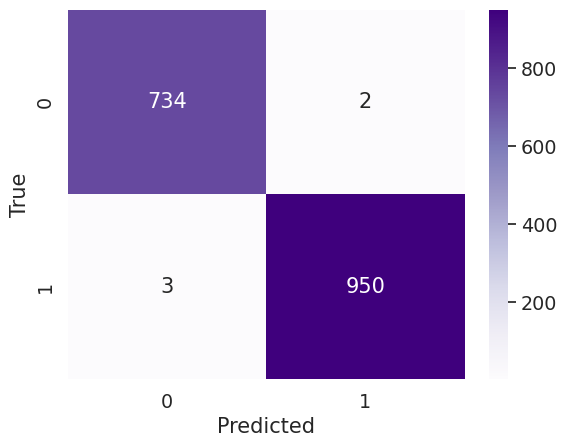

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()